### Problem Statement:
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
### Implimentations:
The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix


Import Most basic Library

In [2]:
df_hr=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_hr.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Read Data set and displayed found there are 1470 Rows and 35 Columns.

In [3]:
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Checked null values data set found no any null values are present.

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Displayed more information about data set, there are 26 columns have dtype is int64 and 9 columns have object dtype.

In [5]:
df_hr.drop(columns=["EmployeeNumber"],inplace=True)
df_hr.drop(columns=["Over18"],inplace=True)
df_hr.drop(columns=["EmployeeCount"],inplace=True)
df_hr.drop(columns=["StandardHours"],inplace=True)

There is  column employe number in the dataset that we can drop as it does not helps so droped it.

Over18 columnn has only one value throughout the dataset so it will not help us in any way so droped it.

Here we see that EmployeeCount is having same vaue in entire dataset it will not help us in any way so droped it.

Here we see that StandardHours has same value throughout it will not help us in any way so droped it.

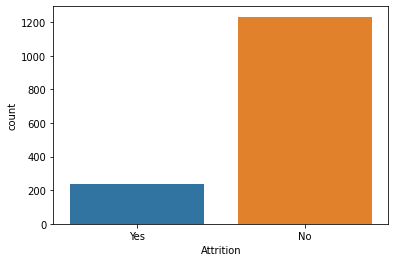

In [6]:
sns.countplot(x='Attrition',data=df_hr)

As per aboveb result this is higly imbalanced dataset

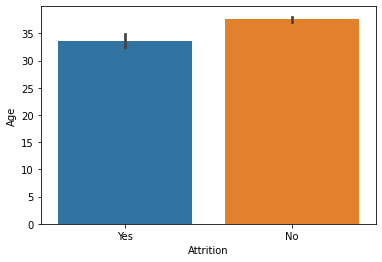

In [7]:
sns.barplot(x="Attrition",y="Age",data=df_hr)

As per aboveb result High avg age pepole are staying more.

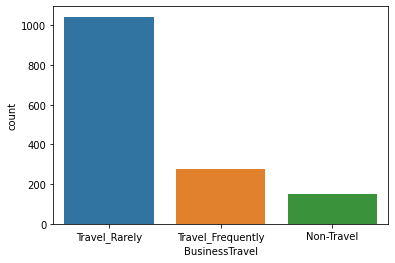

In [8]:
sns.countplot(x="BusinessTravel",data=df_hr)

As chacked the count of employees based on buisness travel is most of the employee travel rarely.

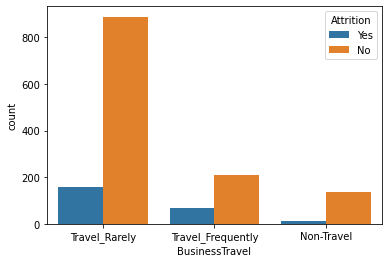

In [9]:
sns.countplot(x="BusinessTravel",data=df_hr,hue="Attrition")

As checked count of each category of buisness travel where employee attrition is true? it can be concluded that proportion of attrition is higher where travel is frequent.


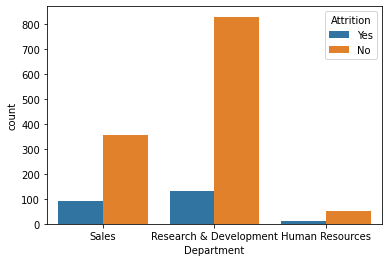

In [10]:
sns.countplot(x="Department",data=df_hr,hue="Attrition")

As checked in which department attrintion is high, Research and development depertment have more attrintion.

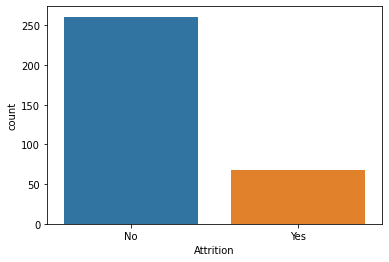

In [11]:
sns.countplot(x="Attrition",data=df_hr.loc[df_hr["DistanceFromHome"]>15])

As checked when distance from home is above 15 kms attrintions is less.

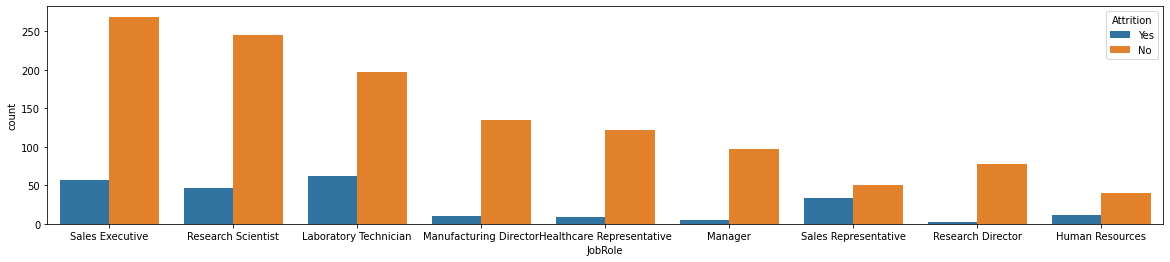

In [12]:
plt.figure(figsize=(20,4))
sns.countplot(x="JobRole",data=df_hr,hue="Attrition")

we analysed the attrition ratio in each category and take corrective actions by understanding the reason behind the attrition

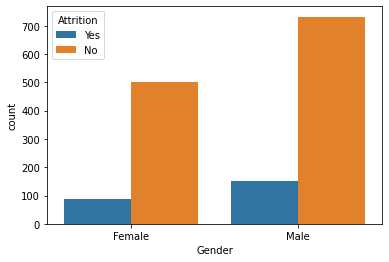

In [13]:
sns.countplot(x="Gender",data=df_hr,hue="Attrition")

As checked the attrition ratio based on gender Male is high.

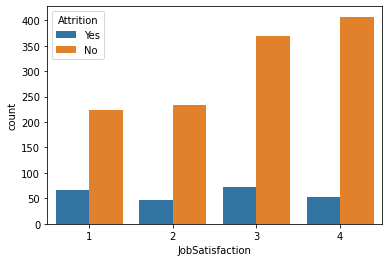

In [14]:
sns.countplot(x="JobSatisfaction",data=df_hr,hue="Attrition")

As chacked the attrition ratio based on job satisfaction, job satisfaction increases proportion of aleavers decreases.

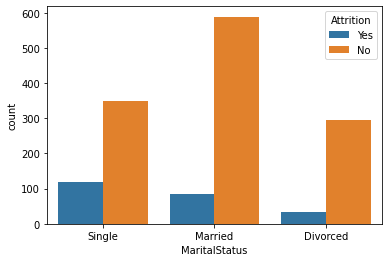

In [15]:
sns.countplot(x="MaritalStatus",data=df_hr,hue="Attrition")

As chacked the attrition ratio in MaritalStatus, in singles ratio is higher

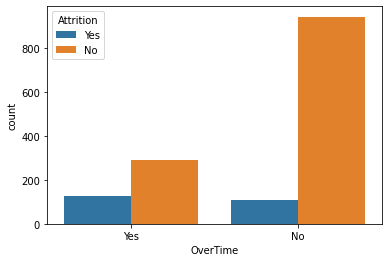

In [16]:
sns.countplot(x="OverTime",data=df_hr,hue="Attrition")

As chacked the proportion of attrition based on overtime, overtime is there then attrition proportion is higher

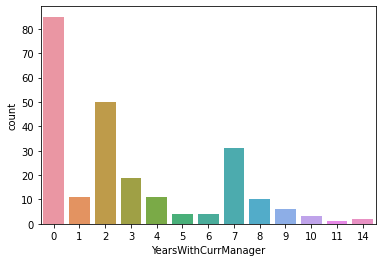

In [17]:
sns.countplot(x="YearsWithCurrManager",data=df_hr.loc[df_hr["Attrition"]=="Yes"])

we came to know that if years working wth current manager is 0 then attrition was very high Also after 2 years of working significant amut of people left
so it can be new project they mved to they dint like job role or something else

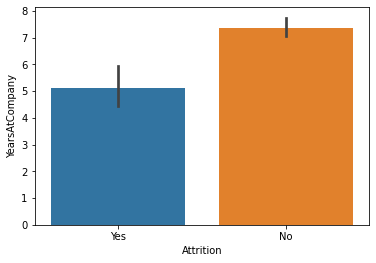

In [18]:
sns.barplot(x="Attrition",y="YearsAtCompany",data=df_hr)

Average working years of the employee who left and stayed, the average number of years employee is staying in the company before leaving.

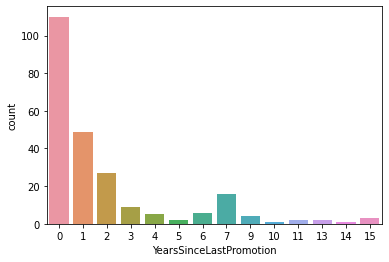

In [19]:
sns.countplot(x='YearsSinceLastPromotion' , data=df_hr[df_hr["Attrition"]=="Yes"])

Check the time laped since  last promotion, majority almost half of people left not even single year passed since last promotion.

we can conclude promotion is not the factr why people left the company

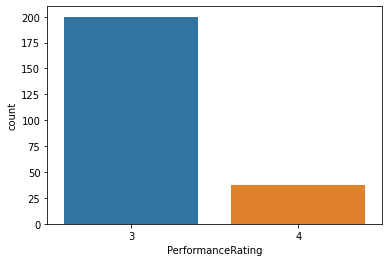

In [20]:
sns.countplot(x="PerformanceRating",data=df_hr.loc[df_hr["Attrition"]=="Yes"])

As checked how performnce rating is afecting attrition level, may be since they expect that their work deserves more rating and is undervalued.

Almost all the people who left were who got rating 3

In [21]:
#from dataprep.eda import create_report
#create_report(df_hr)

In [22]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_hr)
#profile.to_widgets()
#profile.to_file("output1.html")

In [23]:
#sns.pairplot(df_hr)

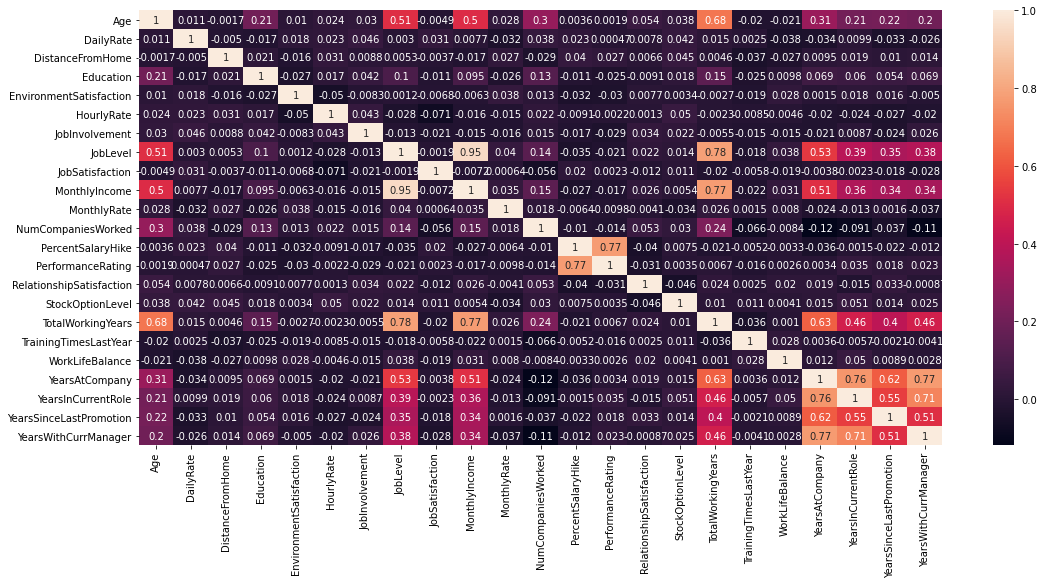

In [24]:
plt.figure(figsize=(18,8))
sns.heatmap(df_hr.corr(),annot=True)

Few features are strongly correlated.

In [25]:
df_x=df_hr.drop(columns=["Attrition"])
y=df_hr[["Attrition"]]

Seprate dependent and independent features.

In [26]:
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


Total count of numeric features:  26
count of features which are significantly skewed:  14

In [27]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


Total count of numeric features:  26
count of features which are significantly skewed:  3

In [28]:
print(df_x.dtypes.loc[df_x.dtypes=="object"])

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


There are 8 number of columns of object datatype

In [29]:
df_x=pd.get_dummies(df_x,drop_first=True)
df_x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,19479,2.197225,2.484907,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,24907,0.693147,3.178054,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,2396,1.945910,2.772589,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,23159,0.693147,2.484907,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,16632,2.302585,2.564949,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,3,41,4,1.098612,4,7.852439,12290,1.609438,2.890372,1.386294,3,0.693147,8.354249,1.921812,9,1.791759,1.098612,0.000000,1.386294,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,4,42,2,1.386294,1,9.209540,21457,1.609438,2.772589,1.386294,1,0.693147,5.301898,3.210402,9,2.079442,2.079442,0.693147,2.079442,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2,87,4,1.098612,2,8.723069,5174,0.693147,3.044522,1.609438,2,0.693147,3.786566,0.000000,9,1.945910,1.098612,0.000000,1.386294,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,4,63,2,1.098612,2,8.592486,13243,1.098612,2.708050,1.386294,4,0.000000,8.354249,1.921812,4,2.302585,1.945910,0.000000,2.197225,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


Using one hot encoding convert above columns to 1 and 0.

In [30]:
from scipy.stats import zscore
z_score=abs(zscore(df_x))
print(df_x.shape)
df_x_final=df_x.loc[(z_score<3).all(axis=1)]
print(df_x_final.shape)

(1470, 44)
(856, 44)


As per above more than 50% data will loss need to avoid.

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

Converted features to common scale as we will use logistic regression also

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, ..., 0, 0, 0])

Convert target class into integers using labelencoder 

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [34]:
print(model.feature_importances_)

[0.03734581 0.02764983 0.03255467 0.02671694 0.03260322 0.02976342
 0.0300291  0.03017699 0.03262999 0.03723708 0.02699647 0.02858658
 0.02695558 0.01156023 0.02991862 0.02767519 0.03671453 0.02525502
 0.03061361 0.03363913 0.03048054 0.02724213 0.03385303 0.02030274
 0.01470485 0.01012486 0.01072409 0.01537022 0.01022109 0.0159304
 0.00624593 0.013034   0.02031969 0.00693228 0.01514045 0.00427079
 0.00713454 0.00231031 0.0113923  0.00851626 0.01208045 0.01532402
 0.02732913 0.0663939 ]


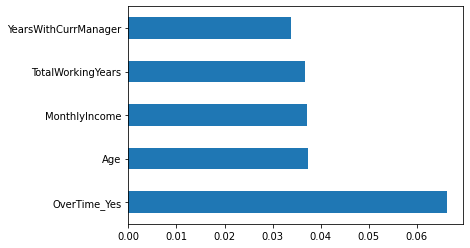

In [35]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Data is imbalance so applied SMOTE and  we will focus on auc-roc score and build a functions for finding random state where auc roc is maximum.

In [37]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7093203548970627
auc roc score corresponding to  43  is  0.7984753208717373
auc roc score corresponding to  44  is  0.76806787837023
auc roc score corresponding to  45  is  0.7285726591437677
auc roc score corresponding to  46  is  0.7103540356619864
auc roc score corresponding to  47  is  0.7270652080282539
auc roc score corresponding to  48  is  0.748815574123525
auc roc score corresponding to  49  is  0.7625118442587647
auc roc score corresponding to  50  is  0.8172107847359807
auc roc score corresponding to  51  is  0.8334481867516581
auc roc score corresponding to  52  is  0.7473511930398828
auc roc score corresponding to  53  is  0.814669652855543
auc roc score corresponding to  54  is  0.726548367645792
auc roc score corresponding to  55  is  0.741235248514084
auc roc score corresponding to  56  is  0.761004393143251
auc roc score corresponding to  57  is  0.7493324145059868
auc roc score corresponding to  58  is  0.7042811611680593
auc 

70

Using logistic regression find max auc roc score corresponding to  random state 70  is  0.8228098888793177.

In [38]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.8425184815957902
standard deviation in roc auc score for logistic classifier:  0.018609160244716556
[0.84281843 0.84569783 0.83607546 0.81505728 0.87294341]


In [39]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6282194848824189
auc roc score corresponding to  43  is  0.6363597209061934
auc roc score corresponding to  44  is  0.6591437677663882
auc roc score corresponding to  45  is  0.619131708157464
auc roc score corresponding to  46  is  0.6479886295115858
auc roc score corresponding to  47  is  0.6312774571453184
auc roc score corresponding to  48  is  0.6692652252562666
auc roc score corresponding to  49  is  0.5193384443104488
auc roc score corresponding to  50  is  0.6489792402446377
auc roc score corresponding to  51  is  0.6246877422689292
auc roc score corresponding to  52  is  0.598371952795245
auc roc score corresponding to  53  is  0.6459643380136101
auc roc score corresponding to  54  is  0.5988457231458351
auc roc score corresponding to  55  is  0.6312774571453184
auc roc score corresponding to  56  is  0.6226634507709535
auc roc score corresponding to  57  is  0.619131708157464
auc roc score corresponding to  58  is  0.6373503316392455


82

Using DecisionTreeClassifier max auc roc score corresponding to  random state 93  is  0.7290464294943578

In [40]:
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.629571446179618
standard deviation in auc roc score for decision tree classifier:  0.023120703785435296
[0.63058943 0.625      0.6859764  0.57709536 0.64139891]


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators=[10,100,500]
criterion=['entropy','gini']
min_samples_split=[2,5,8]
min_samples_leaf=[1,2,4]
parameters={'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=3,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
rf_clf=RandomForestClassifier(n_estimators=500,criterion='entropy',min_samples_leaf=2,min_samples_split=2,)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.5835989318632095
auc roc score corresponding to  43  is  0.6894650702041518
auc roc score corresponding to  44  is  0.6322249978464984
auc roc score corresponding to  45  is  0.5729606339908692
auc roc score corresponding to  46  is  0.6261521233525713
auc roc score corresponding to  47  is  0.6600913084675684
auc roc score corresponding to  48  is  0.6600913084675684
auc roc score corresponding to  49  is  0.5876475148591609
auc roc score corresponding to  50  is  0.6494530105952279
auc roc score corresponding to  51  is  0.5962615212335258
auc roc score corresponding to  52  is  0.6160306658626927
auc roc score corresponding to  53  is  0.6170212765957447
auc roc score corresponding to  54  is  0.6048755276078904
auc roc score corresponding to  55  is  0.5749849254888448
auc roc score corresponding to  56  is  0.5815746403652338
auc roc score corresponding to  57  is  0.5582737531225773
auc roc score corresponding to  58  is  0.61551382548023

80

Using RandomForestClassifier max auc roc score corresponding to random state 80 is 0.6940304935825653

In [43]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
import warnings 
warnings.filterwarnings("ignore") 
leaf_size = list(range(1,10)) 
n_neighbors = list(range(1,30)) 
p=[1,2] 
parameters={"n_neighbors":n_neighbors,"leaf_size":leaf_size, "p":p} 
kc=KNeighborsClassifier() 
clf = GridSearchCV(kc, parameters, cv=3,scoring="roc_auc") 
clf.fit(x,y) 
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 28, 'p': 1}

In [44]:
kc=KNeighborsClassifier(n_neighbors=28, leaf_size=1,p=1 )
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.6019467654406064
auc roc score corresponding to  43  is  0.7361960547850805
auc roc score corresponding to  44  is  0.6885605995348436
auc roc score corresponding to  45  is  0.6318373675596519
auc roc score corresponding to  46  is  0.6997157377896459
auc roc score corresponding to  47  is  0.705788612283573
auc roc score corresponding to  48  is  0.7072960633990869
auc roc score corresponding to  49  is  0.6708588164355243
auc roc score corresponding to  50  is  0.6135756740459988
auc roc score corresponding to  51  is  0.7235334654147644
auc roc score corresponding to  52  is  0.7356792144026186
auc roc score corresponding to  53  is  0.7219829442673787
auc roc score corresponding to  54  is  0.6642260315272632
auc roc score corresponding to  55  is  0.6191747781893359
auc roc score corresponding to  56  is  0.6728831079334998
auc roc score corresponding to  57  is  0.6536308036867947
auc roc score corresponding to  58  is  0.632354207942113

80

Using KNeighborsClassifier max auc roc score corresponding to random state 93 is 0.7589801016452752

In [45]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.1,1,10,100], 'gamma': [0.0001, 0.001,0.01, 0.1,1,10 ]}
clf = GridSearchCV(svc, parameters, cv=3,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [46]:
svc=SVC(kernel="rbf",C=1,gamma=0.01)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.6819278146265828
auc roc score corresponding to  43  is  0.7690584891032819
auc roc score corresponding to  44  is  0.707252993367215
auc roc score corresponding to  45  is  0.6966146954948746
auc roc score corresponding to  46  is  0.6652166422603153
auc roc score corresponding to  47  is  0.7032044103712637
auc roc score corresponding to  48  is  0.7386510466017745
auc roc score corresponding to  49  is  0.7528641571194763
auc roc score corresponding to  50  is  0.6955810147299509
auc roc score corresponding to  51  is  0.7817210784735982
auc roc score corresponding to  52  is  0.7569127401154276
auc roc score corresponding to  53  is  0.7685416487208201
auc roc score corresponding to  54  is  0.7118184167456284
auc roc score corresponding to  55  is  0.7032044103712637
auc roc score corresponding to  56  is  0.6631923507623395
auc roc score corresponding to  57  is  0.700663278490826
auc roc score corresponding to  58  is  0.6991558273753122

93

Using SVC max auc roc score corresponding to random state 82 is 0.0.8050219657162546

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [48]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.6286932552330088
auc roc score corresponding to  43  is  0.6793436127142733
auc roc score corresponding to  44  is  0.675295029718322
auc roc score corresponding to  45  is  0.6666810233439573
auc roc score corresponding to  46  is  0.6246446722370574
auc roc score corresponding to  47  is  0.681367904212249
auc roc score corresponding to  48  is  0.6833921957102247
auc roc score corresponding to  49  is  0.6454044275992764
auc roc score corresponding to  50  is  0.6474287190972521
auc roc score corresponding to  51  is  0.6666810233439573
auc roc score corresponding to  52  is  0.6671978637264191
auc roc score corresponding to  53  is  0.6727538978378843
auc roc score corresponding to  54  is  0.6241278318545955
auc roc score corresponding to  55  is  0.6160306658626927
auc roc score corresponding to  56  is  0.6094409509863037
auc roc score corresponding to  57  is  0.641355844603325
auc roc score corresponding to  58  is  0.6560427254716169


81

Using GradientBoostingClassifier max auc roc score corresponding to random state 80 is 0.7239210957016109

Lets use ada boosting using svm as an estimator

In [49]:
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
max_aucroc_score(ada_clf,x,y)

auc roc score corresponding to  42  is  0.7088465845464726
auc roc score corresponding to  43  is  0.7848221207683693
auc roc score corresponding to  44  is  0.6693082952881385
auc roc score corresponding to  45  is  0.6647859419415971
auc roc score corresponding to  46  is  0.7073391334309589
auc roc score corresponding to  47  is  0.7103971056938583
auc roc score corresponding to  48  is  0.7331811525540529
auc roc score corresponding to  49  is  0.7169437505383753
auc roc score corresponding to  50  is  0.7250409165302782
auc roc score corresponding to  51  is  0.8010595227840469
auc roc score corresponding to  52  is  0.7493754845378585
auc roc score corresponding to  53  is  0.6901111206822292
auc roc score corresponding to  54  is  0.664312171591007
auc roc score corresponding to  55  is  0.7098371952795244
auc roc score corresponding to  56  is  0.7113877164269101
auc roc score corresponding to  57  is  0.6951503144112328
auc roc score corresponding to  58  is  0.681497114307864

51

Using AdaBoostClassifier max auc roc score corresponding to random state 51 is 0.8152295632698768

In [50]:
#Lets choose svm as our final model and random state 82
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 70,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
svc=SVC(kernel="linear",C=0.1,probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[192  55]
 [  5  42]]
f1 score is :  0.5833333333333334
classification report 
               precision    recall  f1-score   support

           0       0.97      0.78      0.86       247
           1       0.43      0.89      0.58        47

    accuracy                           0.80       294
   macro avg       0.70      0.84      0.72       294
weighted avg       0.89      0.80      0.82       294

AUC ROC Score:  0.8354724782496339


As per aboveb svc model giving 85% AUC ROC Score.

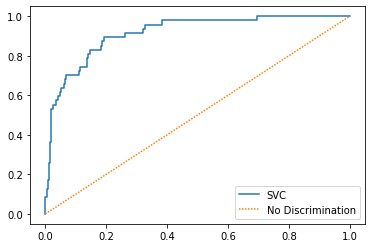

In [52]:
fpr, tpr, thresholds = roc_curve(y_test,svc.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,svc.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='SVC')
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(1, 1))
plt.legend()

Ploted AUC RUC curve of svc model

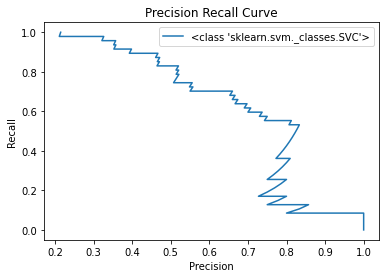

In [53]:
precision, recall, thresholds = precision_recall_curve(y_test,svc.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(precision,recall, label=SVC)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()

Ploted Precision Recall Curve curve of SVC model.

### Create a Function to find ROC, AUC, Prescision and recall curve for overall Module.

In [54]:
roc_dict = {} #ROC dict for TPR and FPR values
prc_dict = {} #precision recall curve

def modify_roc_dict(clf, y_test, x_test, name ,dict_modify): #modifies a dictionary in place and adds keys for ROC metrics
  fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
  clf_roc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
  dict_modify[name] = clf_roc_dict
    
def modify_prc_dict(clf, y_test, x_test, name ,dict_modify): #modifies a dictionary in place and adds keys for precision recall metrics
  precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
  clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
  dict_modify[name] = clf_prc_dict

In [55]:
def fit_score_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
  clf.fit(x_train, y_train) #fit to train data
  y_pred = clf.predict(x_test) #make predictions
  clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)) #make dataframe from report
  clf_report['clf'] = name #add clf name as column
  return clf_report

In [56]:
lr_report = fit_score_clf(svc, x_train, y_train, x_test, y_test, name='SupportVector')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.974619,0.432990,0.795918,0.703804,0.888032,SupportVector
recall,0.777328,0.893617,0.795918,0.835472,0.795918,SupportVector
f1-score,0.864865,0.583333,0.795918,0.724099,0.819858,SupportVector
support,247.000000,47.000000,0.795918,294.000000,294.000000,SupportVector


In [57]:
lr_report = fit_score_clf(rf_clf, x_train, y_train, x_test, y_test, name='RandomForest')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.886029,0.727273,0.87415,0.806651,0.860650,RandomForest
recall,0.975709,0.340426,0.87415,0.658067,0.874150,RandomForest
f1-score,0.928709,0.463768,0.87415,0.696239,0.854382,RandomForest
support,247.000000,47.000000,0.87415,294.000000,294.000000,RandomForest


In [58]:
lr_report = fit_score_clf(ada_clf, x_train, y_train, x_test, y_test, name='AdaBoost')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.941489,0.339623,0.72449,0.640556,0.845273,AdaBoost
recall,0.716599,0.765957,0.72449,0.741278,0.724490,AdaBoost
f1-score,0.813793,0.470588,0.72449,0.642191,0.758927,AdaBoost
support,247.000000,47.000000,0.72449,294.000000,294.000000,AdaBoost


In [59]:
lr_report = fit_score_clf(gb_clf, x_train, y_train, x_test, y_test, name='GradientBoosting')
lr_report.head()


,0,1,accuracy,macro avg,weighted avg,clf
precision,0.887640,0.629630,0.863946,0.758635,0.846394,GradientBoosting
recall,0.959514,0.361702,0.863946,0.660608,0.863946,GradientBoosting
f1-score,0.922179,0.459459,0.863946,0.690819,0.848207,GradientBoosting
support,247.000000,47.000000,0.863946,294.000000,294.000000,GradientBoosting


In [60]:
#see keys we have
roc_dict.keys()

dict_keys([])

In [61]:
modify_roc_dict(clf=svc,y_test=y_test,x_test=x_test,name='SupportVector',dict_modify=roc_dict)
modify_roc_dict(clf=rf_clf,y_test=y_test,x_test=x_test,name='RandomForest',dict_modify=roc_dict)
modify_roc_dict(clf=ada_clf,y_test=y_test,x_test=x_test,name='AdaBoost',dict_modify=roc_dict)
modify_roc_dict(clf=gb_clf,y_test=y_test,x_test=x_test,name='GradientBoosting',dict_modify=roc_dict)

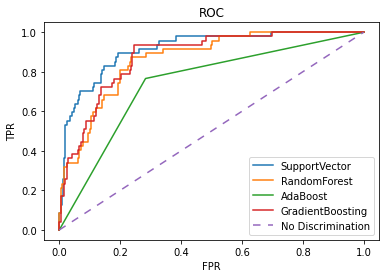

In [62]:
for key in roc_dict:
    clf = roc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.legend()
plt.show()

As per Above curve also its cleared that SVC is giving bet curve.

In [63]:
modify_prc_dict(clf=svc,y_test=y_test,x_test=x_test,name='SupportVector',dict_modify=prc_dict)
modify_prc_dict(clf=rf_clf,y_test=y_test,x_test=x_test,name='RandomForest',dict_modify=prc_dict)
modify_prc_dict(clf=ada_clf,y_test=y_test,x_test=x_test,name='AdaBoost',dict_modify=prc_dict)
modify_prc_dict(clf=gb_clf,y_test=y_test,x_test=x_test,name='GradientBoosting',dict_modify=prc_dict)

In [64]:
prc_dict.keys()

dict_keys(['SupportVector', 'RandomForest', 'AdaBoost', 'GradientBoosting'])

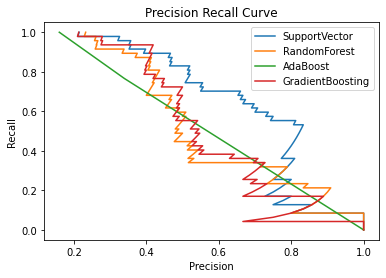

In [65]:
for key in prc_dict:
  clf = prc_dict[key]
  plt.plot(clf['precision'], clf['recall'], label=key)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

Aboveb curve also verified the SVC model is giving best output.